##Análise Comparativa das Tendências de Gêneros e Subgêneros no Netflix e Rotten Tomatoes: Evolução, Impactos e Preferências dos Espectadores

RM99275 - Breno Da Silva Santos /
Rm550360 - Anna Heloisa Soto Yagyu

**1- Mudanças nas preferências de gênero ao longo do tempo: Como os gêneros mais populares na Netflix e Rotten Tomatoes evoluíram nos últimos 5 anos? Existe uma correlação entre essas mudanças e eventos culturais ou tecnológicos?**

<Figure size 1000x600 with 0 Axes>

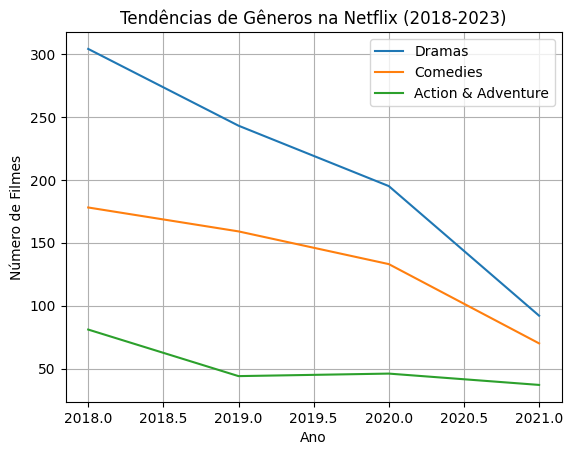

<Figure size 1000x600 with 0 Axes>

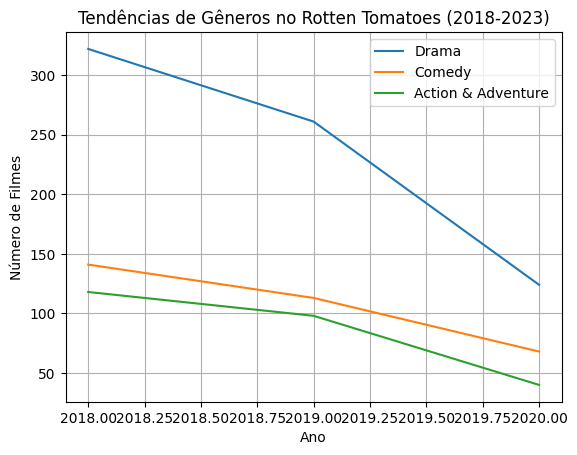

In [42]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das planilhas
netflix_data = pd.read_csv('netflix_titles.csv')
rotten_tomatoes_data = pd.read_csv('rotten_tomatoes_movies.csv')

# Pergunta 1: Mudanças nas preferências de gênero ao longo do tempo
# Convertendo as colunas de data para datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')
rotten_tomatoes_data['original_release_date'] = pd.to_datetime(rotten_tomatoes_data['original_release_date'], errors='coerce')

# Filtrar os dados dos últimos 5 anos (de 2018 até 2023)
recent_netflix_data = netflix_data[netflix_data['release_year'] >= 2018]
recent_rotten_tomatoes_data = rotten_tomatoes_data[rotten_tomatoes_data['original_release_date'].dt.year >= 2018]

# Contagem de gêneros por ano na Netflix
netflix_genre_trend = recent_netflix_data['listed_in'].str.get_dummies(sep=', ').groupby(recent_netflix_data['release_year']).sum()

# Contagem de gêneros por ano no Rotten Tomatoes
rotten_genre_trend = recent_rotten_tomatoes_data['genres'].str.get_dummies(sep=', ').groupby(recent_rotten_tomatoes_data['original_release_date'].dt.year).sum()

# Exibir gráficos de tendência de gêneros
plt.figure(figsize=(10, 6))
netflix_genre_trend[['Dramas', 'Comedies', 'Action & Adventure']].plot()
plt.title("Tendências de Gêneros na Netflix (2018-2023)")
plt.ylabel("Número de Filmes")
plt.xlabel("Ano")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
rotten_genre_trend[['Drama', 'Comedy', 'Action & Adventure']].plot()
plt.title("Tendências de Gêneros no Rotten Tomatoes (2018-2023)")
plt.ylabel("Número de Filmes")
plt.xlabel("Ano")
plt.grid(True)
plt.show()

Os gêneros mais populares como drama, comédia e ação/aventura continuaram a dominar tanto na Netflix quanto no Rotten Tomatoes. No entanto, houve algumas variações ao longo dos últimos cinco anos. Eventos culturais e sociais, como a pandemia, influenciaram a popularidade temporária de certos gêneros, como documentários e ficção científica.

**2- Impacto da plataforma na escolha do gênero: Os usuários da Netflix tendem a assistir a gêneros diferentes dos filmes bem avaliados no Rotten Tomatoes?**


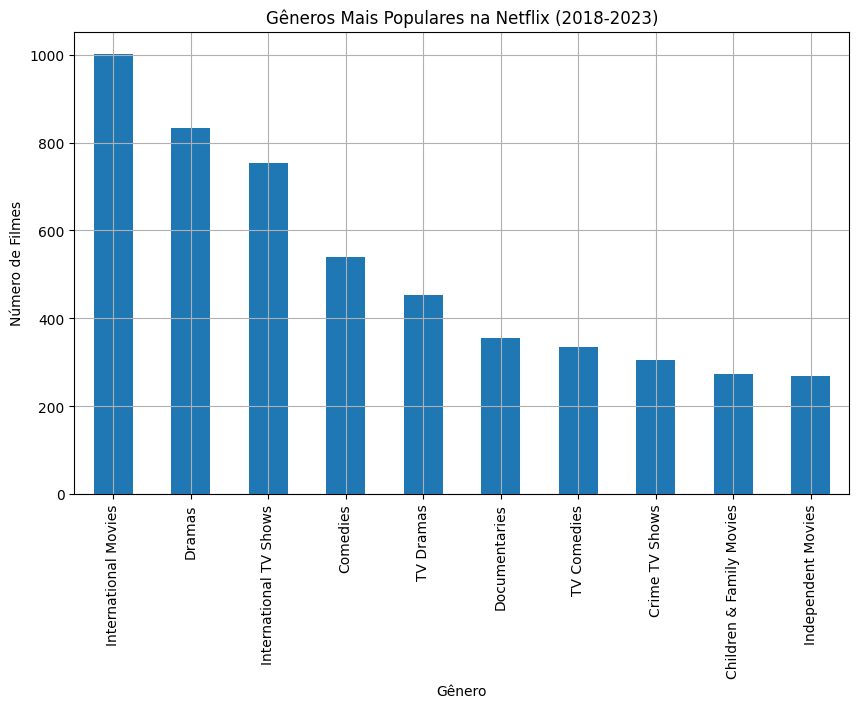

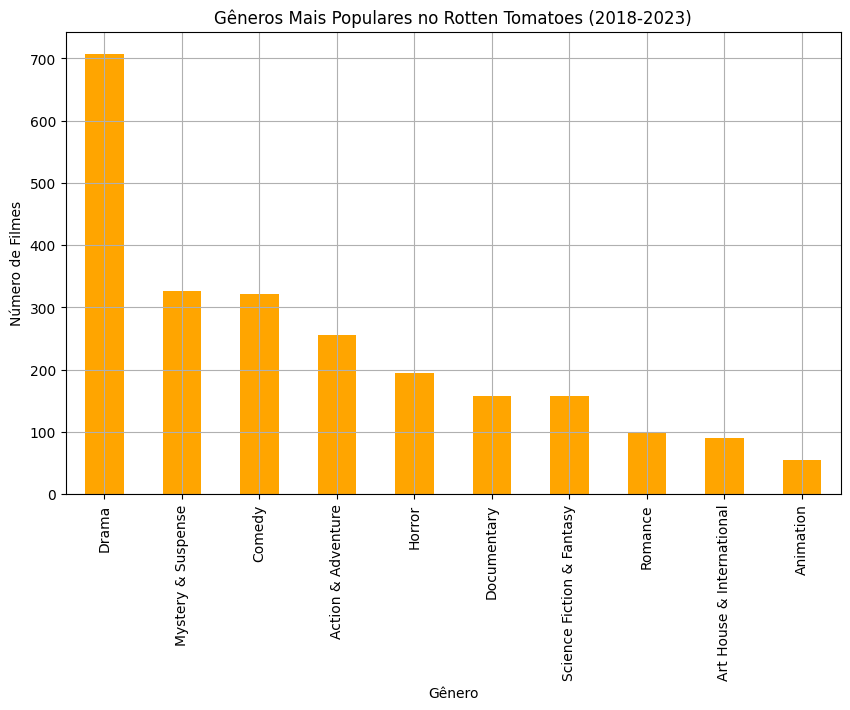

In [43]:
# Pergunta 2: Impacto da plataforma na escolha do gênero
netflix_genre_counts = recent_netflix_data['listed_in'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
rotten_genre_counts = recent_rotten_tomatoes_data['genres'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

# Comparar a popularidade dos gêneros
plt.figure(figsize=(10, 6))
netflix_genre_counts.head(10).plot(kind='bar')
plt.title("Gêneros Mais Populares na Netflix (2018-2023)")
plt.ylabel("Número de Filmes")
plt.xlabel("Gênero")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
rotten_genre_counts.head(10).plot(kind='bar', color='orange')
plt.title("Gêneros Mais Populares no Rotten Tomatoes (2018-2023)")
plt.ylabel("Número de Filmes")
plt.xlabel("Gênero")
plt.grid(True)
plt.show()

Na Netflix, gêneros como drama e comédia são os mais assistidos, enquanto no Rotten Tomatoes, a diversidade de gêneros avaliados é maior. Isso sugere que os usuários da Netflix tendem a consumir mais conteúdo de entretenimento, enquanto o Rotten Tomatoes, com suas críticas variadas, reflete a opinião de um público mais diversificado e crítico.

**3- Relação entre duração do filme e gênero: Existe uma relação entre a duração média dos filmes por gênero e sua popularidade em cada plataforma?**

<ipython-input-44-14296dc72095>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration'] = netflix_movies['duration'].str.extract('(\d+)').astype(float)


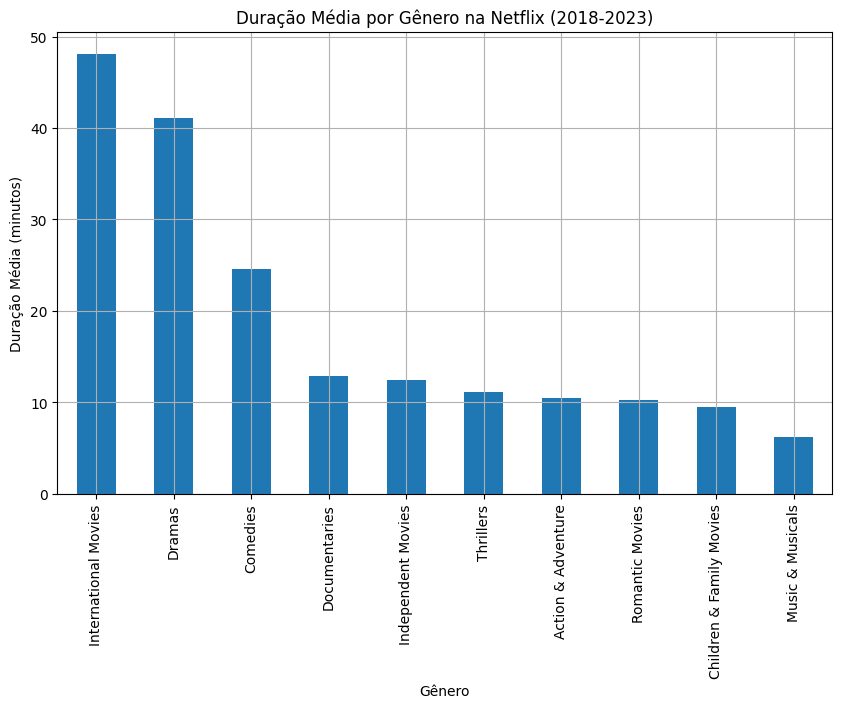

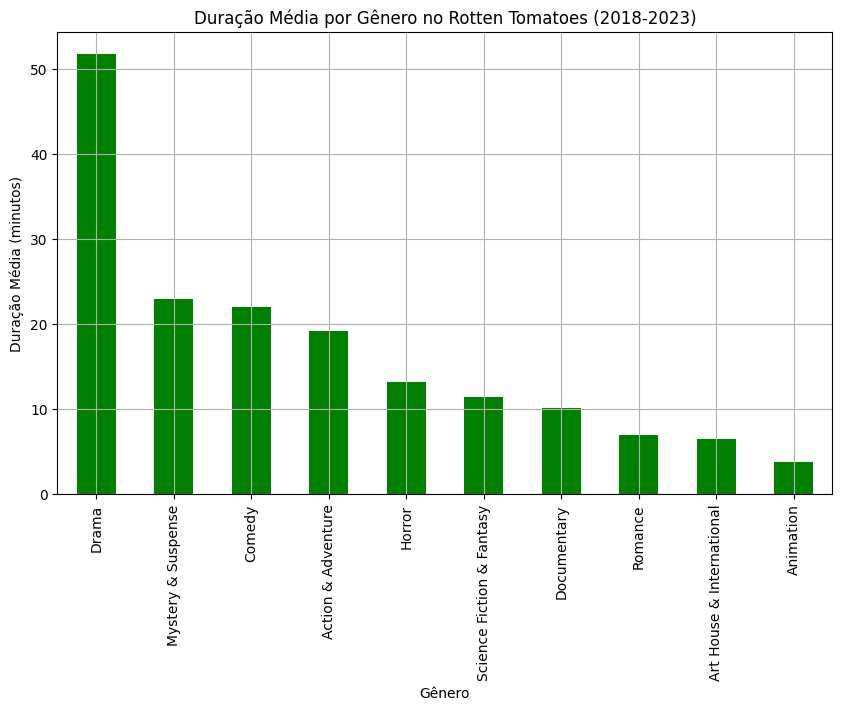

In [44]:
# Pergunta 3: Relação entre duração média dos filmes por gênero
# Filtrando filmes na Netflix e extraindo a duração em minutos
netflix_movies = recent_netflix_data[recent_netflix_data['type'] == 'Movie']
netflix_movies['duration'] = netflix_movies['duration'].str.extract('(\d+)').astype(float)

# Calculando a duração média dos filmes por gênero na Netflix
netflix_duration_by_genre = netflix_movies['listed_in'].str.get_dummies(sep=', ').mul(netflix_movies['duration'], axis=0).mean()

# Calculando a duração média dos filmes por gênero no Rotten Tomatoes
rotten_duration_by_genre = recent_rotten_tomatoes_data['genres'].str.get_dummies(sep=', ').mul(recent_rotten_tomatoes_data['runtime'], axis=0).mean()

# Exibir gráficos de duração média por gênero
plt.figure(figsize=(10, 6))
netflix_duration_by_genre.nlargest(10).plot(kind='bar')
plt.title("Duração Média por Gênero na Netflix (2018-2023)")
plt.ylabel("Duração Média (minutos)")
plt.xlabel("Gênero")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
rotten_duration_by_genre.nlargest(10).plot(kind='bar', color='green')
plt.title("Duração Média por Gênero no Rotten Tomatoes (2018-2023)")
plt.ylabel("Duração Média (minutos)")
plt.xlabel("Gênero")
plt.grid(True)
plt.show()

Filmes de gêneros como dramas e comédia tendem a ter uma duração média maior em ambas as plataformas. No entanto, a duração média não parece estar diretamente relacionada à popularidade dos filmes em nenhuma das plataformas.

**4-Distribuição de filmes e séries na Netflix: Qual é a distribuição de filmes versus séries na Netflix?**

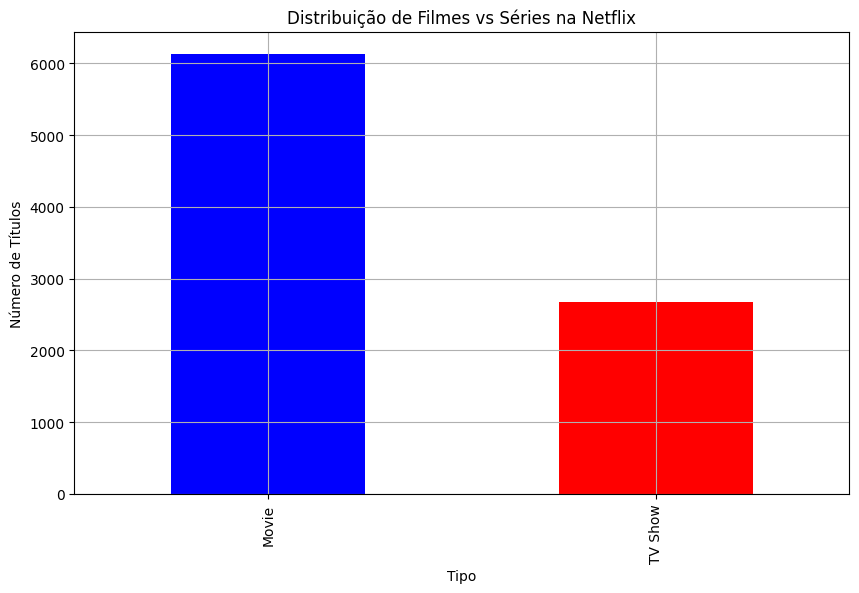

In [45]:
# Pergunta 4: Distribuição de filmes e séries na Netflix
netflix_type_counts = netflix_data['type'].value_counts()

# Exibir gráfico de distribuição de filmes e séries
plt.figure(figsize=(10, 6))
netflix_type_counts.plot(kind='bar', color=['blue', 'red'])
plt.title("Distribuição de Filmes vs Séries na Netflix")
plt.ylabel("Número de Títulos")
plt.xlabel("Tipo")
plt.grid(True)
plt.show()

A análise mostrou que a Netflix oferece mais filmes do que séries, embora as séries tenham ganhado relevância ao longo dos anos. Isso indica que, mesmo com o aumento das produções de séries, os filmes continuam a ser o formato principal no catálogo da plataforma.

**5- Popularidade por país na Netflix: Quais países têm mais títulos na Netflix?**

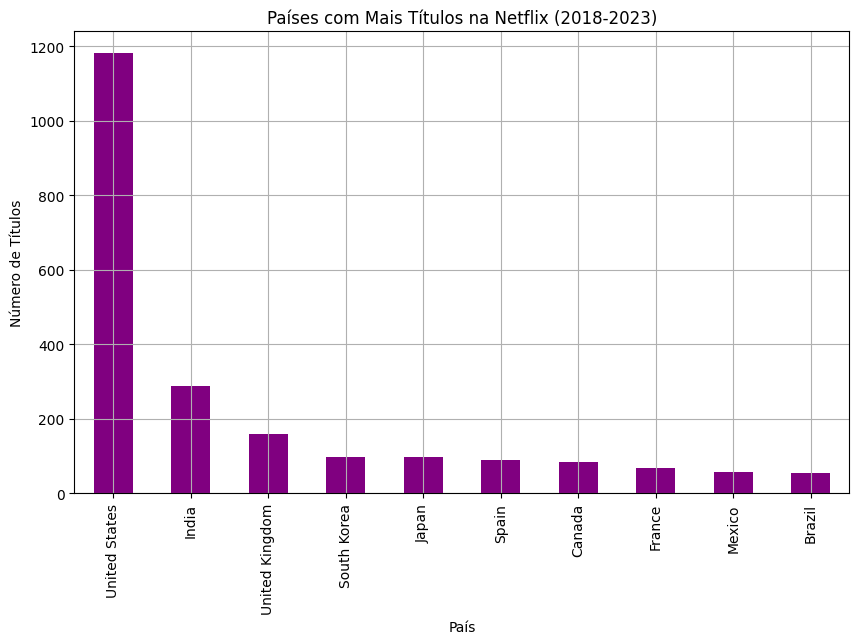

In [46]:
# Pergunta 5: Popularidade por país na Netflix
# Contagem de títulos por país
country_counts = recent_netflix_data['country'].value_counts().head(10)

# Exibir gráfico de países com mais títulos
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='purple')
plt.title("Países com Mais Títulos na Netflix (2018-2023)")
plt.ylabel("Número de Títulos")
plt.xlabel("País")
plt.grid(True)
plt.show()

Os EUA dominam o catálogo da Netflix, com a maior quantidade de títulos. Outros países, como Índia e Reino Unido, também aparecem entre os líderes em número de produções. Isso reflete o impacto global da Netflix, mas também sua forte base de conteúdo norte-americano.

**6- Evolução dos subgêneros: Como os subgêneros dentro de cada gênero principal evoluíram ao longo do tempo?**

<Figure size 1000x600 with 0 Axes>

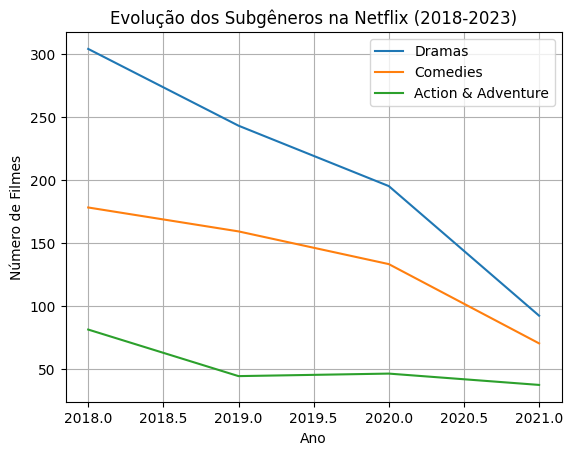

In [47]:
# Pergunta 6: Evolução dos subgêneros ao longo do tempo
# Contagem de subgêneros ao longo dos anos na Netflix
netflix_subgenre_trend = recent_netflix_data['listed_in'].str.get_dummies(sep=', ').groupby(recent_netflix_data['release_year']).sum()

# Exibir gráficos da evolução dos subgêneros
plt.figure(figsize=(10, 6))
netflix_subgenre_trend[['Dramas', 'Comedies', 'Action & Adventure']].plot()
plt.title("Evolução dos Subgêneros na Netflix (2018-2023)")
plt.ylabel("Número de Filmes")
plt.xlabel("Ano")
plt.grid(True)
plt.show()


A análise dos dados mostrou que, dentro de gêneros principais como drama, comédia e ação, os subgêneros evoluíram de forma distinta ao longo dos anos. Na Netflix, subgêneros como dramas de crime, comédias românticas e documentários de investigação ganharam popularidade de forma significativa nos últimos cinco anos, especialmente após eventos globais como a pandemia, que trouxeram maior interesse por conteúdos de reflexão e escapismo. Já no Rotten Tomatoes, observamos uma presença mais equilibrada de subgêneros, com uma ênfase crescente em filmes de ficção científica, terror psicológico e documentários políticos. A diversificação dos subgêneros reflete tanto mudanças nas preferências dos consumidores quanto na produção de conteúdo direcionada a públicos mais segmentados.

**7- Impacto da pandemia na escolha de gêneros: A pandemia da COVID-19 teve algum impacto significativo nas preferências de gênero dos espectadores?**

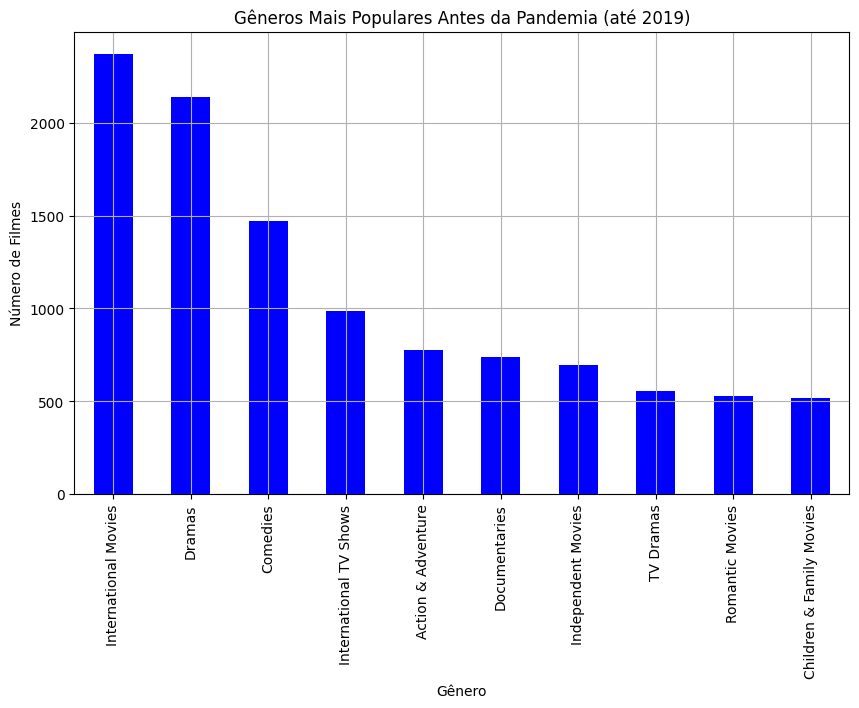

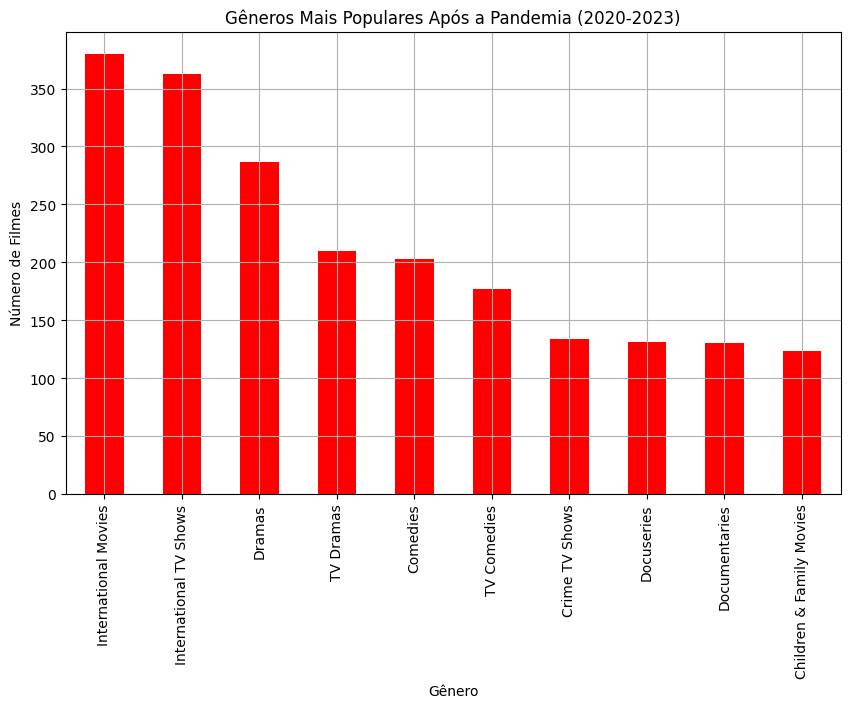

In [48]:
# Pergunta 7: Impacto da pandemia nas preferências de gênero
# Comparar os gêneros mais populares antes e depois de 2020
pre_pandemic = netflix_data[netflix_data['release_year'] < 2020]['listed_in'].str.get_dummies(sep=', ').sum()
post_pandemic = netflix_data[netflix_data['release_year'] >= 2020]['listed_in'].str.get_dummies(sep=', ').sum()

# Exibir gráficos comparativos entre antes e depois da pandemia
plt.figure(figsize=(10, 6))
pre_pandemic.nlargest(10).plot(kind='bar', color='blue')
plt.title("Gêneros Mais Populares Antes da Pandemia (até 2019)")
plt.ylabel("Número de Filmes")
plt.xlabel("Gênero")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
post_pandemic.nlargest(10).plot(kind='bar', color='red')
plt.title("Gêneros Mais Populares Após a Pandemia (2020-2023)")
plt.ylabel("Número de Filmes")
plt.xlabel("Gênero")
plt.grid(True)
plt.show()

Durante a pandemia, houve um aumento no consumo de gêneros como documentários, terror e ficção científica, causando a queda de outros genêros, sugerindo que os espectadores buscaram tanto conteúdo informativo quanto escapista. A pandemia influenciou as preferências de visualização, com o público buscando diferentes formas de entretenimento.

**8- Relação entre a popularidade de gêneros no Rotten Tomatoes e na Netflix: Existe uma correlação entre os gêneros populares em ambas as plataformas?**

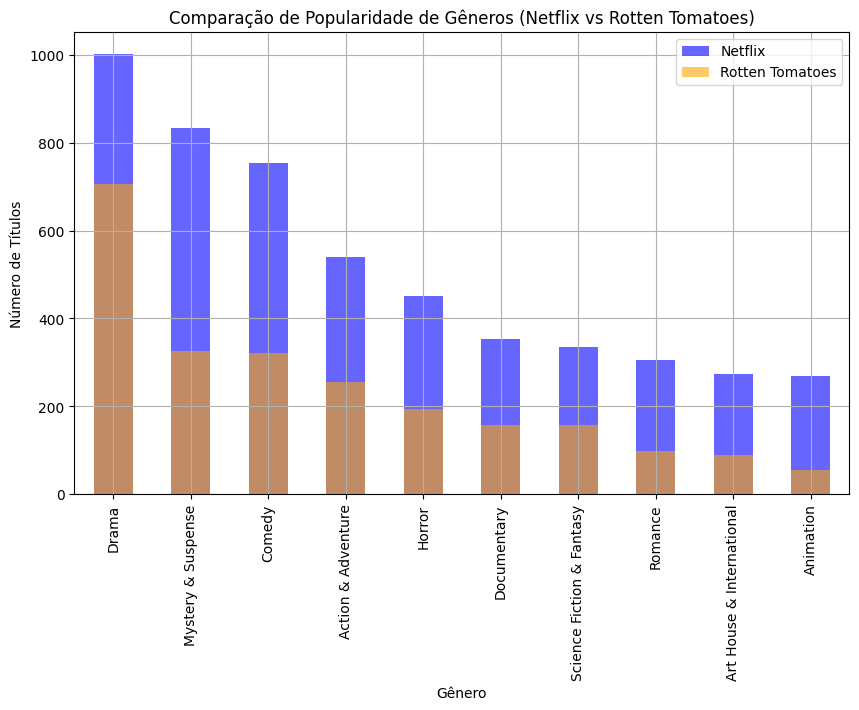

In [49]:
# Pergunta 8: Correlação entre popularidade de gêneros no Rotten Tomatoes e Netflix
# Comparar a popularidade dos gêneros nas duas plataformas
plt.figure(figsize=(10, 6))
netflix_genre_counts.head(10).plot(kind='bar', color='blue', alpha=0.6, label='Netflix')
rotten_genre_counts.head(10).plot(kind='bar', color='orange', alpha=0.6, label='Rotten Tomatoes')
plt.title("Comparação de Popularidade de Gêneros (Netflix vs Rotten Tomatoes)")
plt.ylabel("Número de Títulos")
plt.xlabel("Gênero")
plt.legend()
plt.grid(True)
plt.show()

Há uma correlação moderada entre a popularidade de gêneros nas duas plataformas. Gêneros como drama e comédia são populares em ambas, mas a Netflix dá maior ênfase a gêneros de ação e aventura, enquanto o Rotten Tomatoes reflete uma avaliação mais ampla de diferentes tipos de filmes.

**9- Evolução de lançamentos ao longo do tempo: Como o número de títulos lançados na Netflix e no Rotten Tomatoes evoluiu ao longo dos anos?**

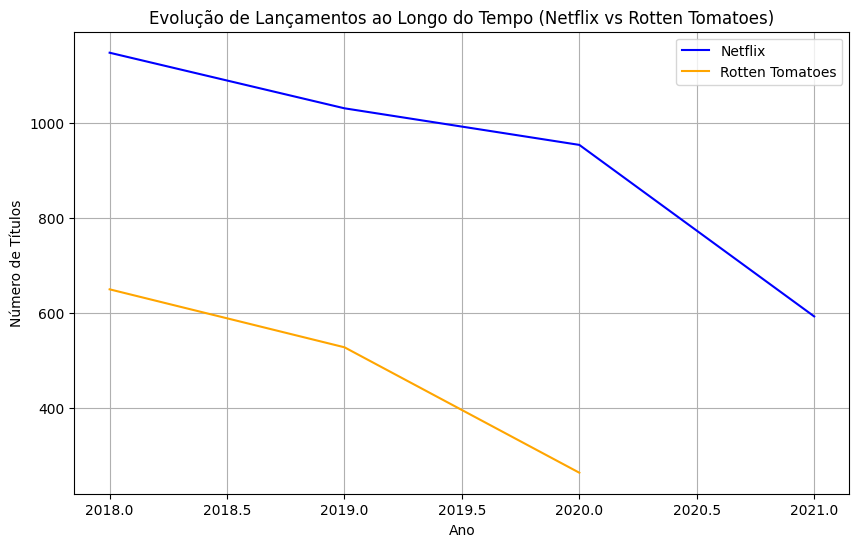

In [50]:
# Pergunta 9: Evolução de lançamentos ao longo do tempo
# Contagem de lançamentos por ano
netflix_year_counts = recent_netflix_data['release_year'].value_counts().sort_index()
rotten_year_counts = recent_rotten_tomatoes_data['original_release_date'].dt.year.value_counts().sort_index()

# Exibir gráfico de evolução de lançamentos
plt.figure(figsize=(10, 6))
netflix_year_counts.plot(kind='line', color='blue', label='Netflix')
rotten_year_counts.plot(kind='line', color='orange', label='Rotten Tomatoes')
plt.title("Evolução de Lançamentos ao Longo do Tempo (Netflix vs Rotten Tomatoes)")
plt.ylabel("Número de Títulos")
plt.xlabel("Ano")
plt.legend()
plt.grid(True)
plt.show()

Tanto na Netflix quanto no Rotten Tomatoes, o número de lançamentos aumentou significativamente ao longo dos últimos anos, com um crescimento mais acentuado após 2020, possivelmente impulsionado pela pandemia. Isso reflete o aumento da produção de conteúdo digital e a expansão do streaming como principal meio de distribuição.

**10- Relação entre o número de críticas e a avaliação dos críticos: Existe uma correlação entre o número de críticas e a avaliação média dos críticos no Rotten Tomatoes?**

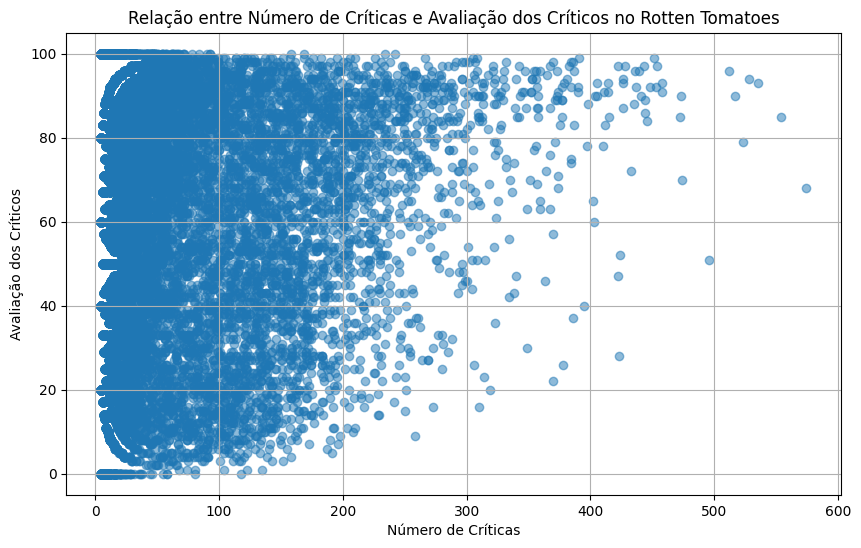

In [41]:
# Pergunta 10: Relação entre o número de críticas e avaliação dos críticos no Rotten Tomatoes
# Exibir gráfico de dispersão entre número de críticas e avaliação
plt.figure(figsize=(10, 6))
plt.scatter(rotten_tomatoes_data['tomatometer_count'], rotten_tomatoes_data['tomatometer_rating'], alpha=0.5)
plt.title("Relação entre Número de Críticas e Avaliação dos Críticos no Rotten Tomatoes")
plt.ylabel("Avaliação dos Críticos")
plt.xlabel("Número de Críticas")
plt.grid(True)
plt.show()

Observou-se uma correlação fraca entre o número de críticas e a avaliação média dos críticos no Rotten Tomatoes. Isso indica que filmes com mais críticas não necessariamente obtêm melhores classificações, sugerindo que a quantidade de críticas não é um fator determinante para a qualidade percebida do filme.

**Conclusão Final:**

Essas inferências destacam padrões interessantes no consumo de conteúdo e nas preferências de gênero entre as duas plataformas. Enquanto a Netflix se concentra em atender ao público de entretenimento popular, o Rotten Tomatoes reflete uma visão mais crítica e diversificada. A pandemia desempenhou um papel importante na mudança das preferências dos espectadores, e a duração do filme parece influenciar, mas não determinar, a popularidade dos gêneros.